In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1 using weighted average of 4-estimates of dy/dt
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

def pendulum( y, t): # y is two-elelment array of theta_i, omega_i
    diff0 = y[1] # dtheta / dt = omega
    diff1 = -(g/L)*np.sin(y[0]) # restoring force
    diff1 -= 2.*beta*y[1] # damping force

    #diff1 += gamma*(g/L)*np.cos(omega_F*t)/m # sinusoidal driving force
    #diff1 += gamma*(g/L)/m # constant driving force
    driveperiod = 2.0 # pulse driving force
    if t%driveperiod <= 0.2:
       diff1 += gamma*(g/L)/m
    return np.array([diff0, diff1]) # return 2-element array of d/dt's of theta_i, omega_i

In [31]:
N = 2000 # number of steps
tau = 20.0 # time range [s]
dt = tau / float(N-1) # time step [s]

t = np.linspace(0, tau, N) # N 1D array evenly spaced t_i time array
theta = np.zeros([N,2]) # Nx2 2D array for theta_i, omega_i state
theta_shm = np.zeros([N,2]) #  Nx2 2D array for theta_i, omega_i SHM

natural freq. =  3.1304951684997055 [rad/s]


Text(0.5, 0.98, 'theta, omega versus time')

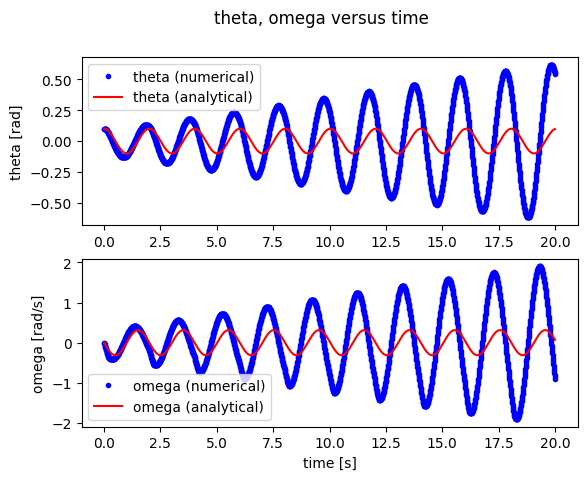

In [36]:
g = 9.8 # grav. acceleration [m/s^2]
L = 1.0 # pendulum length [m]
m = 0.05 # pendulum mass [kg]
natfrq =  np.sqrt(g/L)
beta = 0.001 # 0.31 # damping constant [s^-1]
gamma = -0.005 # driving force size [N]
omega_F = 2.0*natfrq # driving force freq. [s^-1]

print("natural freq. = ", natfrq, "[rad/s]")

theta_o = 0.1 # initial theta [radians]
omega_o = 0.0 # inital omega [rad/s]
theta[0,0] = theta_o
theta[0,1] = omega_o

for j in range(N-1): # rk4 calculation
    theta[j+1,:] = rk4(theta[j,:], t[j], dt, pendulum)

for j in range(N): # analytical calculation
    theta_shm[j,0] = theta_o * np.cos( natfrq*t[j] )  + ( omega_o / natfrq ) * np.sin( natfrq*t[j] )
    theta_shm[j,1] = - theta_o * natfrq * np.sin( natfrq*t[j] )  + omega_o * np.cos( natfrq*t[j] )


fig, axes = plt.subplots(2)

axes[0].plot(t, theta[:,0], "b.", label="theta (numerical)")
axes[0].plot(t, theta_shm[:,0], "r-", label="theta (analytical)")
axes[0].set_ylabel('theta [rad]')
axes[0].legend()

axes[1].plot(t, theta[:,1], "b.", label="omega (numerical)")
axes[1].plot(t, theta_shm[:,1], "r-", label="omega (analytical)")
axes[1].set_ylabel('omega [rad/s]')
axes[1].legend()

axes[1].set_xlabel('time [s]')
fig.suptitle('theta, omega versus time')